### AIM: To help Client setup a new restaurants by measuring different metrices such as theme, cuisine, cost, type of restaurants based on the location

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("zomato.csv")

df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
# let's check how many rows and columns are there in dataset  .shape will return (r,c) values
df.shape

(51717, 17)

In [4]:
df.columns


Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df.isna().sum()    # checking null values

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
#% of missing values
df.isnull().sum()/len(df)*100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [7]:
# dropping columns which are not useful or having lots of null values

data = df.drop(['url', 'address','phone','dish_liked','reviews_list','menu_item'], axis=1)

data.head(10)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8/5,286,Basavanagudi,Casual Dining,North Indian,600,Buffet,Banashankari
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,Buffet,Banashankari
7,Onesta,Yes,Yes,4.6/5,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,Cafes,Banashankari
8,Penthouse Cafe,Yes,No,4.0/5,324,Banashankari,Cafe,"Cafe, Italian, Continental",700,Cafes,Banashankari
9,Smacznego,Yes,No,4.2/5,504,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550,Cafes,Banashankari


In [8]:
data.drop_duplicates(inplace=True)
data.shape



(51609, 11)

In [9]:
data.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7755
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     344
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [10]:
# now lets clean the rate column, I just want rate I don't want /5 so frist let's check the unique values

data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
# let's remove the 'NEW' '-' and '/5' from rate columns

def updaterate(value):
    if (value == 'NEW' or value == "-"):
        return np.nan
    else:
        value = str(value).split('/')   # we'll split 4.1/5 into list ['4.1', '5'] and then we need 0th element of list
        value = value[0]
        return float(value)

data['rate'] = data['rate'].apply(updaterate)
data['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [12]:
 # let's check how many null values are there in rate column
    
data['rate'].isnull().sum()

10019

In [13]:
# so let's fill the null value my mean 
data['rate'].shape

# from this we can see that there are total 51,609 rate values and out of them there are 10,019 null value so we can use 
# mean to fill the null values

(51609,)

In [14]:
data['rate'].fillna(data['rate'].mean(), inplace=True)
data['rate'].isnull().sum()  

# as you can see we filled all the null values to the mean means avg of all the remaining non-null values

0

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
name                           51609 non-null object
online_order                   51609 non-null object
book_table                     51609 non-null object
rate                           51609 non-null float64
votes                          51609 non-null int64
location                       51588 non-null object
rest_type                      51382 non-null object
cuisines                       51564 non-null object
approx_cost(for two people)    51265 non-null object
listed_in(type)                51609 non-null object
listed_in(city)                51609 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [16]:
# now columns like 'location', 'rest_type', 'cuisinnes', 'approx_cost' has some few null values so we can just drop them

data.dropna(inplace=True)
data.head(10)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600,Buffet,Banashankari
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,Buffet,Banashankari
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,Cafes,Banashankari
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Cafe, Italian, Continental",700,Cafes,Banashankari
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550,Cafes,Banashankari


In [17]:
# now let's rename the long columns nam using .rename function

data.rename(columns = {'approx_cost(for two people)' : 'costof2', 'listed_in(type)': 'type', 'listed_in(city)' :'city'} , inplace = True)

data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costof2,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [18]:
data['costof2'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [19]:
 # here we can see thay there are values which are seperated by , so it restricted to become integer so we have to handle this

def removecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')      # replacing comma with empty string
        return float(value)
    else:
        return float(value)

data['costof2'] = data['costof2'].apply(removecomma)

data['costof2'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [20]:
# now clean the rest type columns 

rest_type_count = data['rest_type'].value_counts()
rest_type_count

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Cafe, Food Court                  2
Bakery, Food Court                2
Pop Up                            2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [21]:
# here we can see that there are lot of unique values but there are so many values which are less no of restaurants so what
# we can do is we can make a cluster of values let's sayless than 1000 as max is 19000 and rename thatclusters as 'Others'

rest_type_lessthan1000 = rest_type_count[rest_type_count < 1000]

rest_type_lessthan1000

Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Cafe, Food Court                2
Bakery, Food Court              2
Pop Up                          2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

In [22]:
# now lets make a cluster

def handlerestvalue(value):
    if(value in rest_type_lessthan1000):
        return 'others'
    else:
        return value

data['rest_type'] = data['rest_type'].apply(handlerestvalue)
data['rest_type'].value_counts()

Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

In [23]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costof2,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


In [24]:
data['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [25]:
# drop city as city and location has the same values

data = data.drop(['city'], axis=1)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costof2,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [26]:
# now clean the cusisnes column

cuisines_count = data['cuisines'].value_counts()
cuisines_count

North Indian                                    2852
North Indian, Chinese                           2351
South Indian                                    1820
Biryani                                          903
Bakery, Desserts                                 898
                                                ... 
Chinese, Street Food, Ice Cream                    1
Cafe, Continental, Steak                           1
Italian, North Indian, South Indian, Chinese       1
Street Food, Chinese, Fast Food                    1
North Indian, Beverages, Juices                    1
Name: cuisines, Length: 2704, dtype: int64

In [27]:
# here also there are lot of values having less number of restaurants so we can again make cluster and name it others4
cuisines_count_lessthan100 = cuisines_count[cuisines_count < 100]

def handlecuisine(value):
    if(value in cuisines_count_lessthan100):
        return 'others'
    else:
        return value

data['cuisines'] = data['cuisines'].apply(handlecuisine)
data['cuisines'].value_counts()

others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
North Indian, Chinese, Seafood           102
Italian, Pizza                           102
Name: cuisines, Length: 70, dtype: int64

In [28]:
locations = data['location'].value_counts()

location_lessthan300 = locations[locations < 300]

def handlelocation(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value

data['location'] = data['location'].apply(handlelocation)

data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costof2,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [29]:
# let's jump to visualization



## Q) Which are the top chain restaurants in Bangaluru ??

Text(0.5, 0, 'Number of outlets')

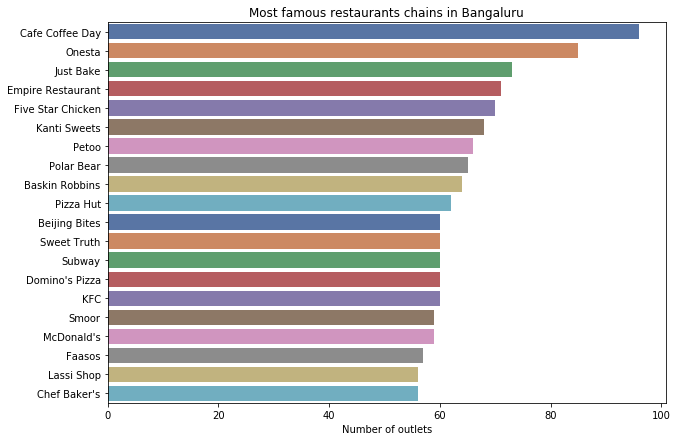

In [30]:
plt.figure(figsize=(10,7))

chains = data['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")

## Q) In which location there are MAXIMUM and MINIMUM numbers of restaurants are there?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

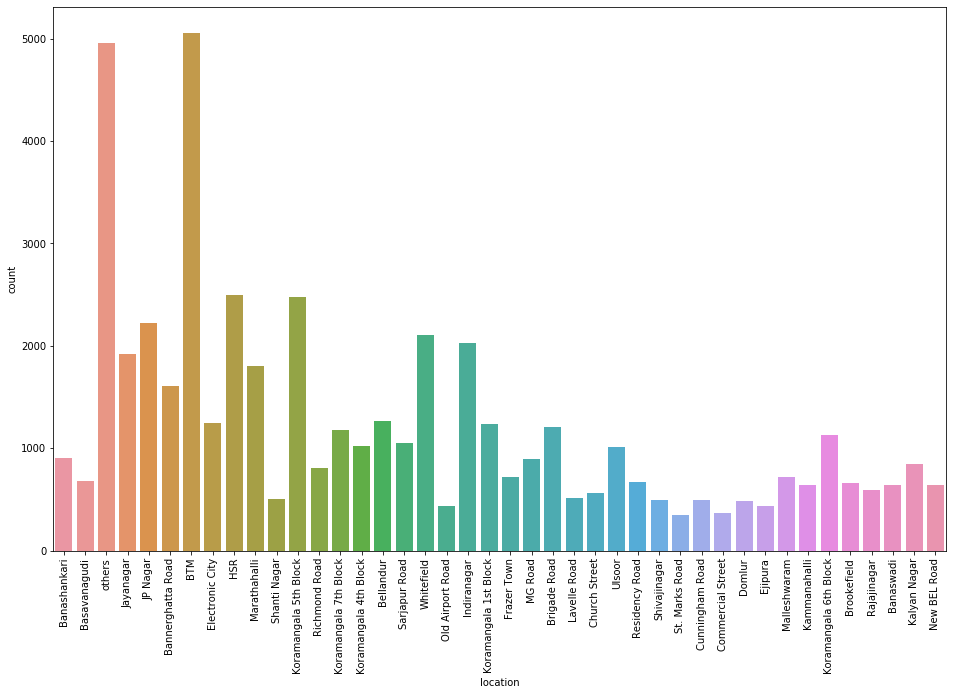

In [31]:
# count plot of various locations

plt.figure(figsize = (16,10))
sns.countplot(x = 'location', data = data)
plt.xticks(rotation=90)

## Answer: 
Maximum : BTM 
Minimum : St. Marks Road

###  Q) Now if someone wants to open a new restaurant where he/she should open it 

asnweer to this question will be the Place where there are minimum numbers of restaurants like ST MARKS RD, SHANTI NAGAR, OLD AIRORT RD because if we will open the restaurant where there are so many already then our restaurant will not work so instead open at location where there are few number of restauranst

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

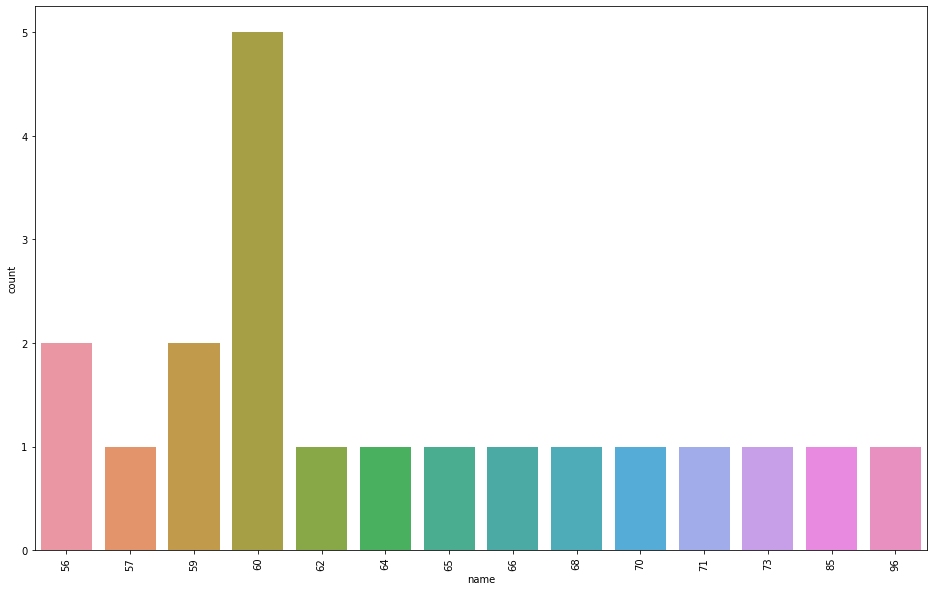

In [32]:
# count plot of top chain restaurants in bengaluru

plt.figure(figsize = (16,10))

chains = data['name'].value_counts()[0:20]

sns.countplot(x = chains, data = data)
plt.xticks(rotation=90)

In [33]:
# https://www.kaggle.com/code/harshapalnitkar/zomato-banglore-store-analysis

Text(0.5, 0, 'count')

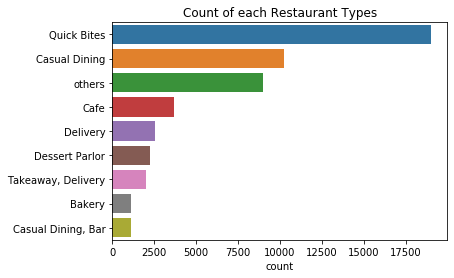

In [34]:
#Top 10 most popular restaurant types

from collections import Counter
r_type=data['rest_type'].value_counts()[:10]
sns.barplot(x=r_type,y=r_type.index)
plt.title("Count of each Restaurant Types")
plt.xlabel("count")

Text(0.5, 0, 'count')

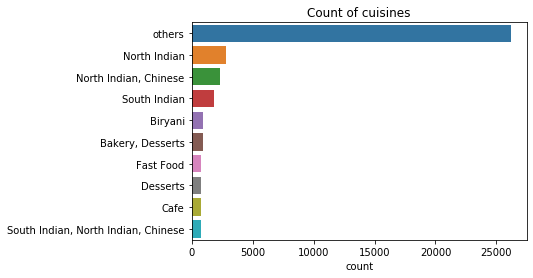

In [35]:
# top cuisines

from collections import Counter
cuisines=data['cuisines'].value_counts()[:10]
sns.barplot(x=cuisines,y=cuisines.index)
plt.title("Count of cuisines")
plt.xlabel("count")

In [36]:
data.groupby('location')['name'].unique()

location
BTM                      [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari             [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Banaswadi                [Cafe Nibras, The Sanctuary, Crunch Pizzas, 9 ...
Bannerghatta Road        [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi             [Grand Village, Timepass Dinner, Srinathji's C...
Bellandur                [Kava - Fairfield by Marriott, MoMo Cafe - Cou...
Brigade Road             [Kitchen On Table, Panchavati Gaurav Thali, Sa...
Brookefield              [Onesta, Imperio Restaurant, Zaica Dine & Wine...
Church Street            [Oh! Calcutta, Mainland China, Empire Restaura...
Commercial Street        [The Chocolate Heaven, Norsha Caffe, Utse Kitc...
Cunningham Road          [Skylit - Citrus Hotels, Banjara Melting Pot, ...
Domlur                   [Kerala Pavilion, Warm Oven, Potful, Indiana B...
Ejipura                  [Punjabi Dhaba, McLeans Italian Pizzeria, Chun...
Electronic City 

In [37]:
#Number of restaurants at different locations in bengalore :-

restaurant=[]
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))
    
    
df_total=pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10)

,restaurant
location,
Bellandur,349
Jayanagar,352
Bannerghatta Road,448
JP Nagar,502
Indiranagar,526
Marathahalli,659
HSR,684
Electronic City,696
BTM,699


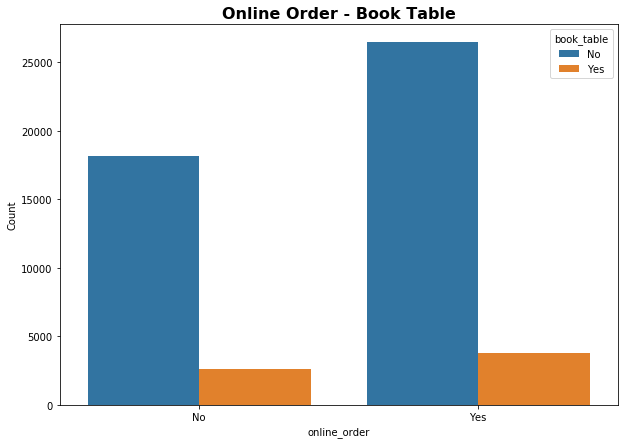

In [38]:
df_online_booking = data.groupby(["online_order", "book_table"]).size().reset_index(name = "Count")
plt.figure(figsize = (10,7))
sns.barplot(x="online_order", y="Count", hue="book_table", data=df_online_booking)
plt.title("Online Order - Book Table", fontsize=16, fontweight='bold')
plt.show()

Observation: We observe that maximum restaurants provide online ordering but not table booking facility. The number of restaurants providing table booking facility but not online order is the least. More than 15000 restaurants don't provide online ordering as well as table booking facility.

So in case we are planning to start a restaurant and we want some facility to have a lower priority then we can think about this one

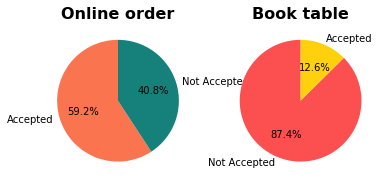

In [39]:
label1 = ["Accepted",'Not Accepted']
label2 = ['Not Accepted', "Accepted"]

df_online = data['online_order'].value_counts().values
df_table = data['book_table'].value_counts().values

fig, ax1 = plt.subplots(nrows=1, ncols=2)

color1 = ['#FA744F', '#16817A']
color2 = ['#FC5050', '#FFD00C']

ax1[0].pie(df_online, labels=label1, autopct='%1.1f%%', startangle=90, colors=color1)
ax1[0].set_title('Online order', fontsize=16, fontweight='bold')

ax1[1].pie(df_table, labels=label2, autopct='%1.1f%%', startangle=90, colors=color2)
ax1[1].set_title('Book table', fontsize=16, fontweight='bold')
plt.show()

Observation: 59.2% of the restaurants accept online order and 40.8% don't. Only 12.6% of the restaurants provide table booking facility whereas 87.4% don't.



### # Is cost affected by online order and table bookings ??


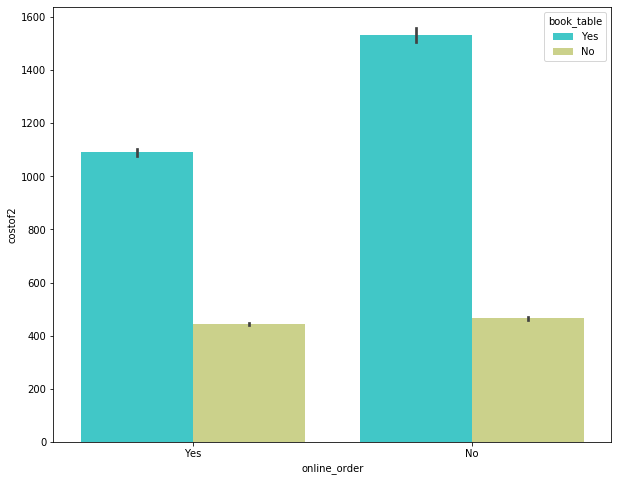

In [40]:

plt.figure(figsize=(10,8))
sns.barplot(data=data, x='online_order', y='costof2', hue='book_table', palette='rainbow')
plt.show()

Observation: Restaurants which don't accept online orders but provide table booking have the highest approx_cost value above Rs 1500, whereas restaurants which accept online orders and provide table booking have an approx_cost near Rs 1000. Restaurants which don't provide table booking have an approx_cost of Rs 400  




### what kind of distribution does rate follow ?

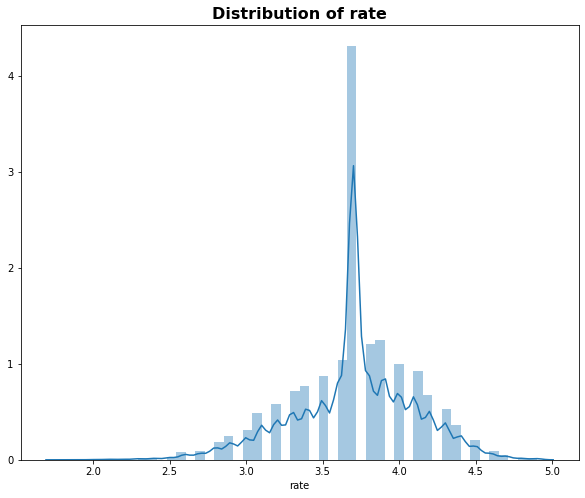

In [41]:
 # Density plot to visualize rate

plt.figure(figsize = (10, 8))
sns.distplot(data['rate'])
plt.title("Distribution of rate", fontsize=16, fontweight='bold')
plt.show()

Observation: More than 50 percent of restaurants have rating between 3 and 4. Restaurants having rating more than 4.5 and less than 2.5 are very rare

In [42]:
data["costof2"]

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: costof2, Length: 51042, dtype: float64

### Do cost differ with a change in location ??

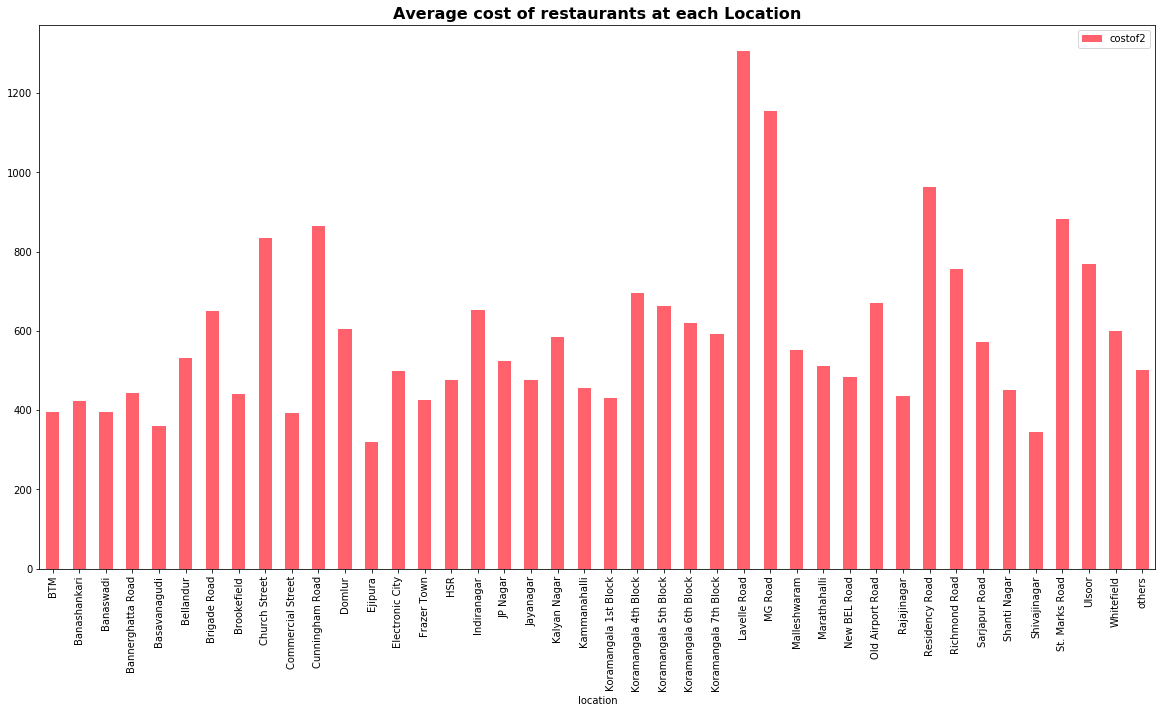

In [43]:
# Average cost of restaurants at each loaction

a = data.groupby('location').agg({'costof2':'mean'})

plt.rcParams["figure.figsize"] = (20,10)
a.plot(kind='bar', color='#FF616D')
plt.title('Average cost of restaurants at each Location', fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [44]:
a.sort_values("costof2", ascending=False)

,costof2
location,
Lavelle Road,1307.046332
MG Road,1156.215006
Residency Road,964.083458
St. Marks Road,883.673469
Cunningham Road,865.204082
Church Street,834.982332
Ulsoor,768.150346
Richmond Road,756.600249
Koramangala 4th Block,696.361849


### What is the relation between vote and ratings ??

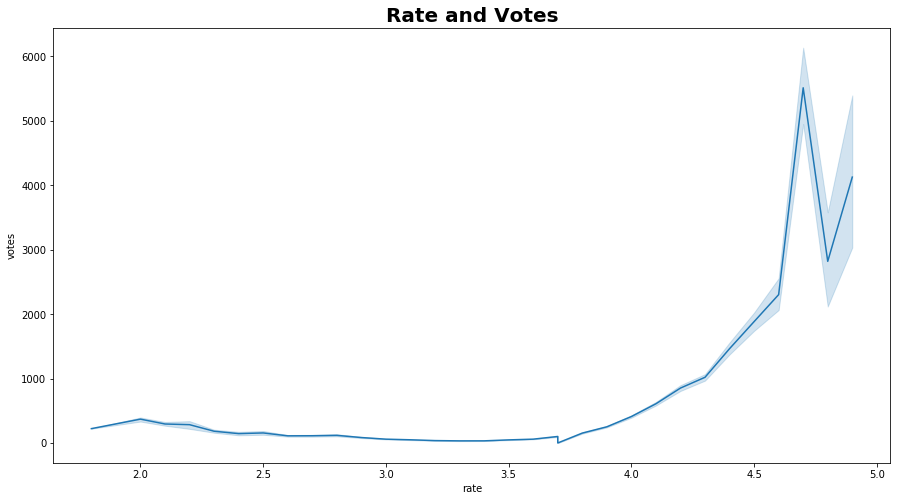

In [45]:
# Relation of rate and votes

plt.figure(figsize=(15,8))
sns.lineplot(x='rate', y='votes', data=data)
plt.title('Rate and Votes', fontsize=20, fontweight='bold')
plt.show()

Observation:- The line plot indicates that for ratings greater than 4.0 the number of votes is more and for less ratings the number of votes are less. Hence, restaurants with high rating also have high votes.